In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("vehicle-depreciation.csv")
print(df)

       VehicleID CustomerGrade AuctionPurchaseDate  AuctionPurchaseAmount  \
0           9466             D          2013-10-30                 6315.0   
1          13266             B          2014-07-03                 9955.0   
2          20422             B          2012-02-03                 6975.0   
3          32375             B          2012-11-29                 6240.0   
4           7190             B          2014-02-19                 7825.0   
5          32024             C          2011-12-15                 7725.0   
6          33673             B          2014-08-07                 8225.0   
7          23553             C          2013-05-30                 7140.0   
8          22423             B          2012-08-13                 8040.0   
9           2203             B          2013-07-24                 9225.0   
10          7341             B          2014-04-07                 9785.0   
11          6293             B          2013-07-11                 7750.0   

In [4]:
df.columns

Index(['VehicleID', 'CustomerGrade', 'AuctionPurchaseDate',
       'AuctionPurchaseAmount', 'AuctionSaleDate', 'AuctionSaleAmount',
       'VehicleType', 'Year', 'Make', 'Model', 'Trim', 'BodyType',
       'AuctionPurchaseOdometer', 'AutomaticTransmission', 'DriveType'],
      dtype='object')

In [5]:
df.shape

(16500, 15)

In [59]:
#cleaning the data
print("Loss: %d" % df.loc[df.AuctionSaleAmount < df.AuctionPurchaseAmount].count()['VehicleType'])
print("Very few km: " , df.loc[df.AuctionPurchaseOdometer < 5000].count()['VehicleType'])
print("Too many km: " , df.loc[df.AuctionPurchaseOdometer > 200000].count()['VehicleType'])
print("BodyType: " , df['BodyType'].unique())
print("Vehicle types: " , df['VehicleType'].unique())


# Cleaning data
#valid_models = df.dropna()

#### Removing the duplicates
df = df.drop_duplicates(['VehicleID', 'CustomerGrade', 'AuctionPurchaseDate',
       'AuctionPurchaseAmount', 'AuctionSaleDate', 'AuctionSaleAmount',
       'VehicleType', 'Year', 'Make', 'Model', 'Trim', 'BodyType',
       'AuctionPurchaseOdometer', 'AutomaticTransmission', 'DriveType'])

#### Removing the outliers




Loss: 16406
Very few km:  14
Too many km:  104
BodyType:  ['Coupe' 'Sedan' 'Mini-Van' 'SUV' 'Wagon' 'Pickup' 'Hatchback'
 'Convertible']
Vehicle types:  ['Car' 'Van' 'SUV' 'Truck']


In [7]:
#check for null values
df.isnull().sum()

VehicleID                     0
CustomerGrade                 0
AuctionPurchaseDate           0
AuctionPurchaseAmount         0
AuctionSaleDate               0
AuctionSaleAmount             0
VehicleType                   0
Year                          0
Make                          0
Model                         0
Trim                          0
BodyType                      0
AuctionPurchaseOdometer       0
AutomaticTransmission         0
DriveType                  6015
dtype: int64

In [8]:
#drop drive type
df['DriveType'].fillna(value='not-declared', inplace=True)



In [9]:
#coss check if column has been dropped 
df.isnull().sum()

VehicleID                  0
CustomerGrade              0
AuctionPurchaseDate        0
AuctionPurchaseAmount      0
AuctionSaleDate            0
AuctionSaleAmount          0
VehicleType                0
Year                       0
Make                       0
Model                      0
Trim                       0
BodyType                   0
AuctionPurchaseOdometer    0
AutomaticTransmission      0
DriveType                  0
dtype: int64

CustomerGrade
C    6909
B    6566
A    2701
D     324
Name: CustomerGrade, dtype: int64


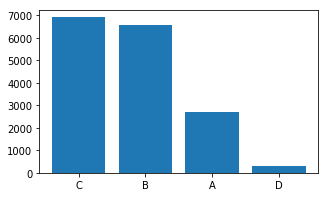

AuctionPurchaseDate
2013-11-07    61
2014-02-05    61
2014-06-05    58
2014-06-24    58
2013-12-11    56
Name: AuctionPurchaseDate, dtype: int64


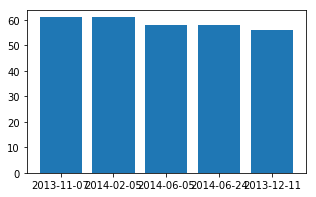

AuctionPurchaseAmount
8240.0    180
7240.0    180
7740.0    174
6740.0    172
8740.0    165
Name: AuctionPurchaseAmount, dtype: int64


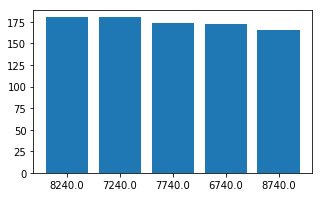

AuctionSaleDate
2015-11-25    209
2015-11-24    198
2015-10-28    169
2015-10-27    160
2015-10-14    157
Name: AuctionSaleDate, dtype: int64


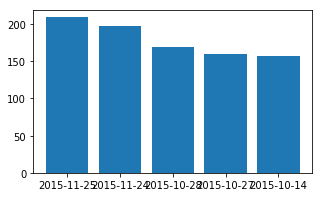

AuctionSaleAmount
0.0       21
4708.0    10
1987.0    10
2627.0     9
1827.0     9
Name: AuctionSaleAmount, dtype: int64


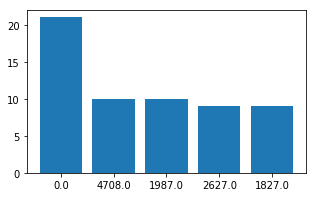

VehicleType
Car      11555
SUV       3321
Truck      838
Van        786
Name: VehicleType, dtype: int64


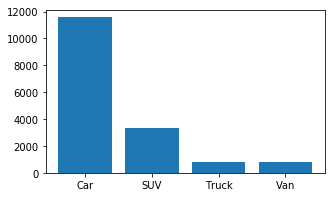

Year
2007    2940
2008    2752
2006    2530
2010    1643
2009    1625
Name: Year, dtype: int64


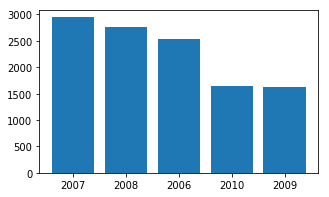

Make
Chevrolet    3280
Ford         2276
Dodge        1957
Chrysler     1312
Nissan       1075
Name: Make, dtype: int64


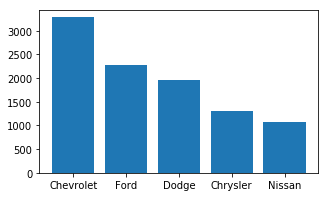

Model
Impala     999
Fusion     647
Malibu     515
HHR        396
Avenger    389
Name: Model, dtype: int64


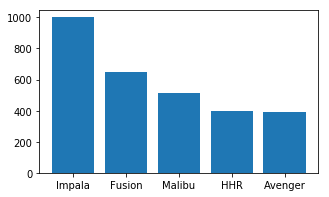

Trim
Base    1729
SE      1531
LT      1299
LS      1214
LX       747
Name: Trim, dtype: int64


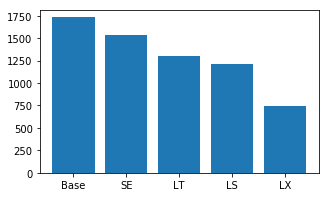

BodyType
Sedan       8754
SUV         3321
Wagon       1705
Pickup       838
Mini-Van     786
Name: BodyType, dtype: int64


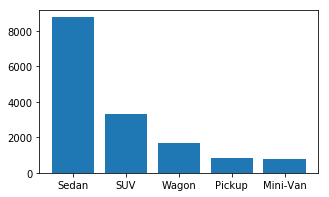

AuctionPurchaseOdometer
80000    7
84195    6
98123    5
89534    4
94083    4
Name: AuctionPurchaseOdometer, dtype: int64


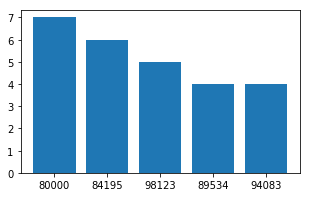

AutomaticTransmission
1    16129
0      371
Name: AutomaticTransmission, dtype: int64


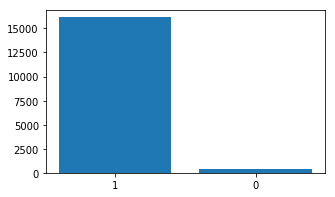

DriveType
FWD             7824
not-declared    6015
RWD             1334
AWD              519
4WD              387
Name: DriveType, dtype: int64


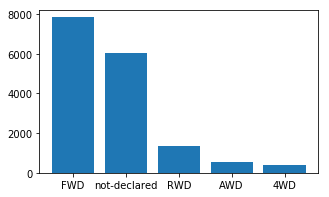

In [10]:
#pictorial or visual view of the data
cat = ['CustomerGrade', 'AuctionPurchaseDate',
       'AuctionPurchaseAmount', 'AuctionSaleDate', 'AuctionSaleAmount',
       'VehicleType', 'Year', 'Make', 'Model', 'Trim', 'BodyType',
       'AuctionPurchaseOdometer', 'AutomaticTransmission', 'DriveType']

for i, c in enumerate(cat):
    v = df[c].unique()
    
    g = df.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    #plt.xticks(r, v)
    plt.xticks(r, g.index)
    plt.show()

In [ ]:
print(df['BodyType'])

In [ ]:
df.shape

In [ ]:
Pickup = df[df['BodyType'] == 'Pickup']
sedan = df[df['BodyType'] == 'Sedan']

Coupe = df[df['BodyType'] == 'Coupe']
Mini_Van = df[df['BodyType'] == 'Mini-Van']
SUV = df[df['BodyType'] == 'SUV']
Hatchback = df[df['BodyType'] == 'Hatchback']
Wagon = df[df['BodyType'] == 'Wagon']

print('Pickup: {}'.format(len(df[df['BodyType'] == 'Pickup'])))
print('sedan: {}'.format(len(df[df['BodyType'] == 'Sedan'])))
print('Coupe: {}'.format(len(df[df['BodyType'] == 'Coupe'])))
print('Mini-Van: {}'.format(len(df[df['BodyType'] == 'Mini-Van'])))
print('SUV: {}'.format(len(df[df['BodyType'] == 'SUV'])))
print('Hatchback: {}'.format(len(df[df['BodyType'] == 'Hatchback'])))
print('Wagon: {}'.format(len(df[df['BodyType'] == 'Wagon'])))


In [ ]:
X=df['AuctionPurchaseAmount']
Y=df['AuctionSaleAmount']
Vehicle=df.groupby('BodyType')
print(Vehicle)

The features that would directly determine the vehicle depreciation from observation of the given dataset are the AuctionPurchaseAmount and the AuctionSaleAmount, the period (AuctionPurchaseDate and AuctionSaleDate) will also be explored to observe how much they influence depreciation.

Will plot a histogram AuctionPurchaseAmount and AuctionSaleAmount to see if the company was making a loss or profit durin the auction and by what margin.

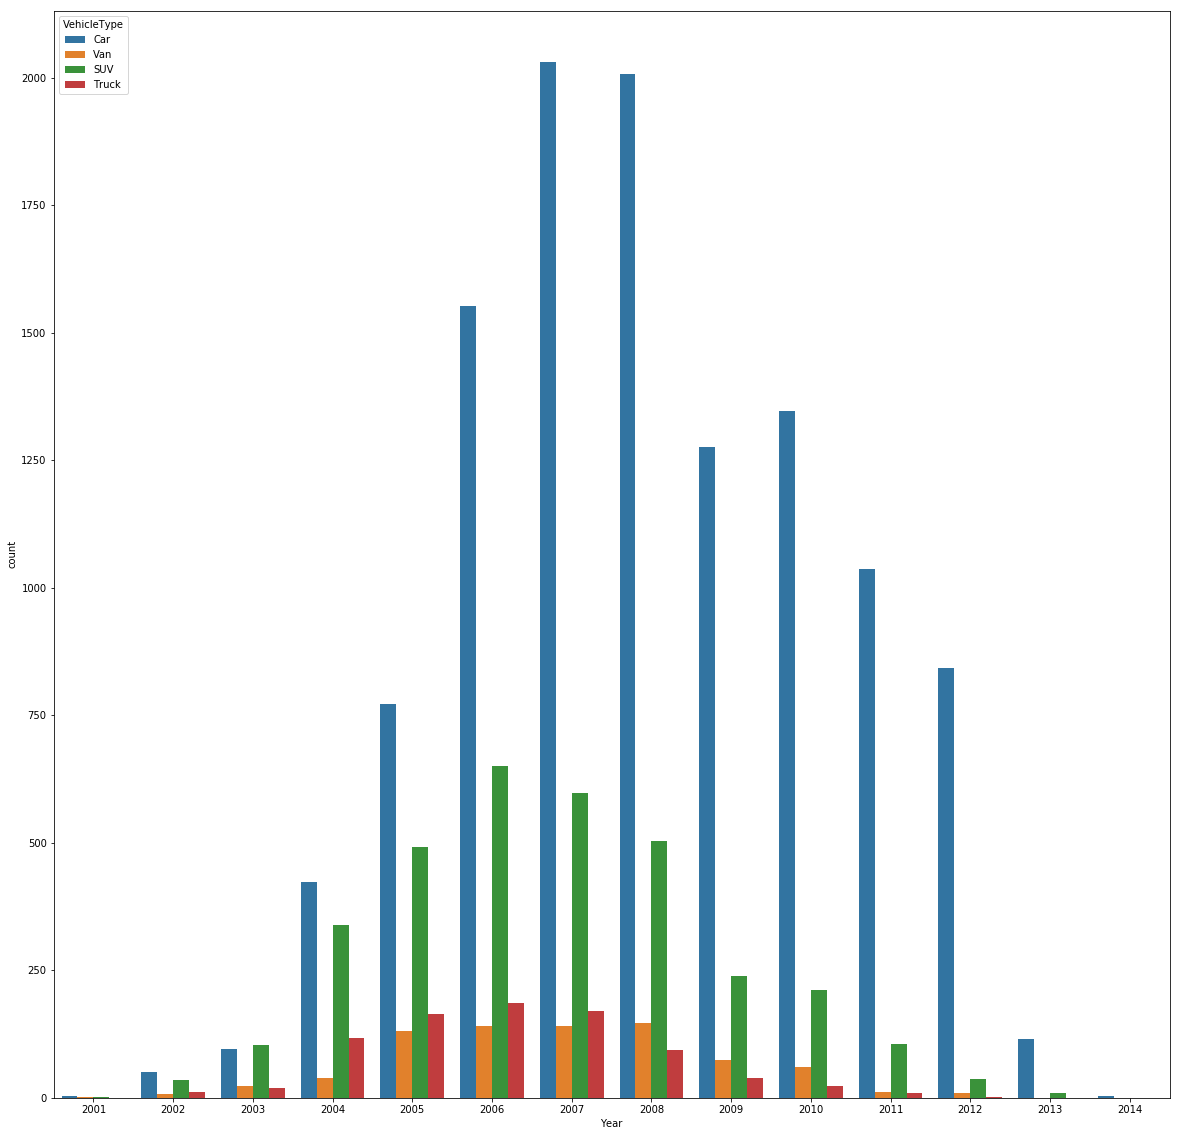

In [15]:
fig = plt.subplots(1,1, figsize = (20,20))
sns.countplot(df['Year'], hue = df['VehicleType'])

Fromt the plot we can see the number of vehicles purchased during the period 2001 and 2014, from the plots cars have been the most purched vehicle type,followed by SUV, then tracks, and finally Vans.
More vehicles where purchased between the years 2004 and 2014, the increase in the purchase of cars and SUVs was exponential between 2004 and 2012.

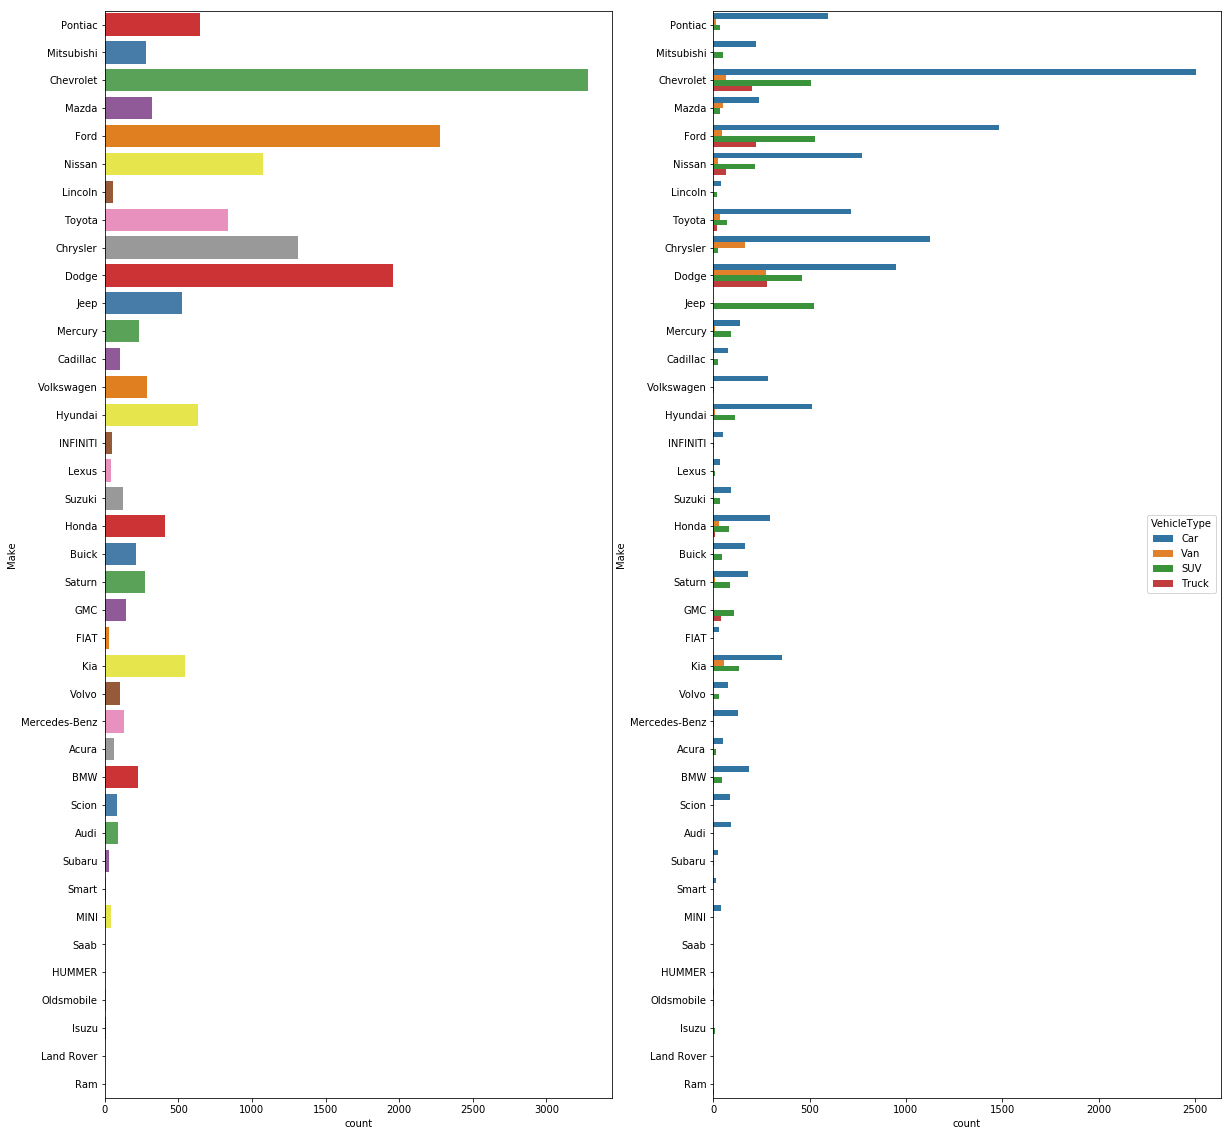

In [61]:
#vehicle make 
fig, ax = plt.subplots(1,2, figsize = (20,20))
sns.countplot(y = df['Make'],ax = ax[0], palette = 'Set1')
sns.countplot(y = df['Make'], hue = df['VehicleType'],ax = ax[1])

The chevrolet is the vehicle that makes the majority of the purchased vehicles from the plot above

(0, 31040.670807496637)

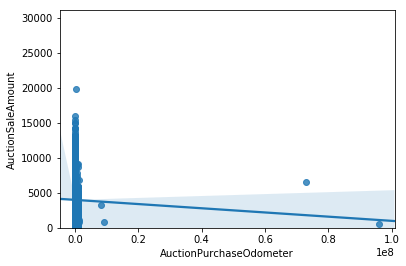

In [26]:
#  potential predictor variable of price
sns.regplot(x="AuctionPurchaseOdometer", y="AuctionSaleAmount", data=df)
plt.ylim(0,)

In [27]:
df[["AuctionPurchaseOdometer", "AuctionSaleAmount"]].corr()


,AuctionPurchaseOdometer,AuctionSaleAmount
AuctionPurchaseOdometer,1.000000,-0.012604
AuctionSaleAmount,-0.012604,1.000000


The correlation between AuctionPurchaseOdometer and AuctionSaleAmount is -0.012604, 

(0, 20917.94980241604)

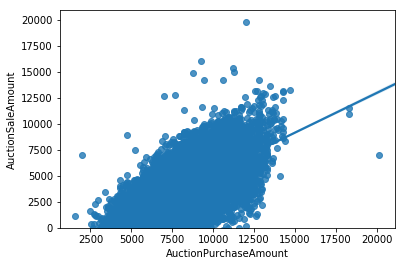

In [23]:
#  potential predictor variable of price
sns.regplot(x="AuctionPurchaseAmount", y="AuctionSaleAmount", data=df)
plt.ylim(0,)

In [24]:
df[["AuctionPurchaseAmount", "AuctionSaleAmount"]].corr()


,AuctionPurchaseAmount,AuctionSaleAmount
AuctionPurchaseAmount,1.000000,0.623743
AuctionSaleAmount,0.623743,1.000000


The correlation is about 0.67 between AuctionPurchaseAmount and AuctionSaleAmount
We can see that the higher the purchase amount, the higher the sale amount too,The two variables have a strong correlation

Categorical variables

These are variables that describe a characteristic of a data unit.  To visualise these categorical variables we will use boxplots.

1. Let's look at the relationship between "VehicleType" and "AuctionSaleAmount".
2. Let's look at the relationship between "BodyType" and "AuctionSaleAmount"
3. Let's look at the relationship between "DriveType" and "AuctionSaleAmount"

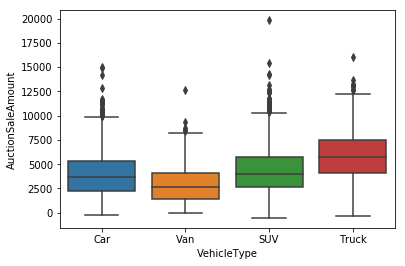

In [34]:
sns.boxplot(x="VehicleType", y="AuctionSaleAmount", data=df)


The distribution of price between the different VehicleType categories differs; as such drive-wheels could potentially be a predictor of depreciation.

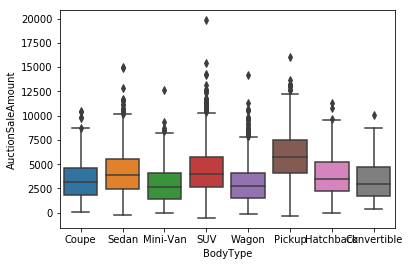

In [35]:
sns.boxplot(x="BodyType", y="AuctionSaleAmount", data=df)


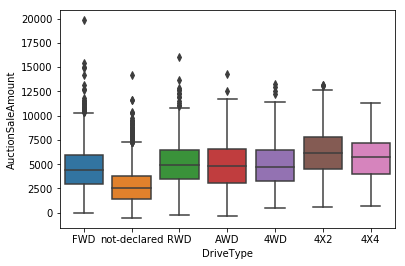

In [36]:
sns.boxplot(x="DriveType", y="AuctionSaleAmount", data=df)


Observing the variables by utilizing a description method.

The describe function automatically computes basic statistics for all continuous variables.  NaN values will automatically skipped in these statistics and so they have to be treated

The describe method will show:

the count of that variable
the mean
the standard deviation (std)
the minimum value
the IQR (Interquartile Range: 25%, 50% and 75%)
the maximum value
We can apply the method "describe" as follows:

In [37]:
df.describe()

,VehicleID,AuctionPurchaseAmount,AuctionSaleAmount,Year,AuctionPurchaseOdometer,AutomaticTransmission
count,16500.000000,16500.000000,16500.000000,16500.00000,1.650000e+04,16500.000000
mean,17825.909697,8237.234498,3984.954775,2007.65903,1.026773e+05,0.977515
std,10327.578233,1834.249806,2247.038759,2.28432,9.450164e+05,0.148259
min,3.000000,1567.090000,-536.000000,2001.00000,2.200000e+01,0.000000
25%,8920.750000,6950.000000,2298.105000,2006.00000,7.706775e+04,1.000000
50%,17745.000000,8200.000000,3748.825000,2007.00000,8.901650e+04,1.000000
75%,26834.250000,9445.000000,5457.575000,2009.00000,9.779200e+04,1.000000
max,35650.000000,20157.000000,19823.360000,2014.00000,9.606667e+07,1.000000


The default setting of the describe function skips variables of type object but we can apply the method on the variables of type 'object' as follows:

In [38]:
df.describe(include=['object'])


,CustomerGrade,AuctionPurchaseDate,AuctionSaleDate,VehicleType,Make,Model,Trim,BodyType,DriveType
count,16500,16500,16500,16500,16500,16500,16500,16500,16500
unique,4,1029,238,4,39,309,476,8,7
top,C,2014-02-05,2015-11-25,Car,Chevrolet,Impala,Base,Sedan,FWD
freq,6909,61,209,11555,3280,999,1729,8754,7824


To further explore our data we will use value-counts which will help us understand how many units of each characteristic/variable we have. 

In [40]:
df['VehicleType'].value_counts()

Car      11555
SUV       3321
Truck      838
Van        786
Name: VehicleType, dtype: int64

In [41]:
#We can convert the series to a Dataframe as follows :
df['VehicleType'].value_counts().to_frame()


,VehicleType
Car,11555
SUV,3321
Truck,838
Van,786


I have repeated the above steps for body-type and drive type

In [46]:
df['BodyType'].value_counts()

Sedan          8754
SUV            3321
Wagon          1705
Pickup          838
Mini-Van        786
Hatchback       574
Coupe           375
Convertible     147
Name: BodyType, dtype: int64

In [47]:
df['BodyType'].value_counts().to_frame()

,BodyType
Sedan,8754
SUV,3321
Wagon,1705
Pickup,838
Mini-Van,786
Hatchback,574
Coupe,375
Convertible,147


In [48]:
df['DriveType'].value_counts()

FWD             7824
not-declared    6015
RWD             1334
AWD              519
4WD              387
4X2              318
4X4              103
Name: DriveType, dtype: int64

In [49]:
df['DriveType'].value_counts().to_frame()

,DriveType
FWD,7824
not-declared,6015
RWD,1334
AWD,519
4WD,387
4X2,318
4X4,103


To further understand our data we will group by category to have a more refined understanding of the data, 

In [51]:
df.columns

Index(['VehicleID', 'CustomerGrade', 'AuctionPurchaseDate',
       'AuctionPurchaseAmount', 'AuctionSaleDate', 'AuctionSaleAmount',
       'VehicleType', 'Year', 'Make', 'Model', 'Trim', 'BodyType',
       'AuctionPurchaseOdometer', 'AutomaticTransmission', 'DriveType'],
      dtype='object')

In [52]:
df['VehicleType'].unique()


array(['Car', 'Van', 'SUV', 'Truck'], dtype=object)

we want to know, on average, how much was spent on aucation purchase of each vehicle type and how much was made for auction sale for each vehicle type, we can group "VehicleType" and then average them then compare both results to see if a loss or profit was made and how the margin looks like

We will select the columns 'VehicleType', 'AuctionPurchaseAmount' and 'AuctionSaleAmount', then assign it to the variable "df_group_one".

In [53]:
df_group_one = df[['VehicleType','AuctionPurchaseAmount','AuctionSaleAmount']]


In [54]:
# grouping results
df_group_one = df_group_one.groupby(['VehicleType'],as_index=False).mean()
df_group_one

,VehicleType,AuctionPurchaseAmount,AuctionSaleAmount
0,Car,8114.790936,3842.670821
1,SUV,8577.994731,4267.838204
2,Truck,9645.437947,5870.671742
3,Van,7096.135445,2870.965471


[Text(0.5, 1.0, 'Auction Purchase amount VS Auction Sale Amount')]

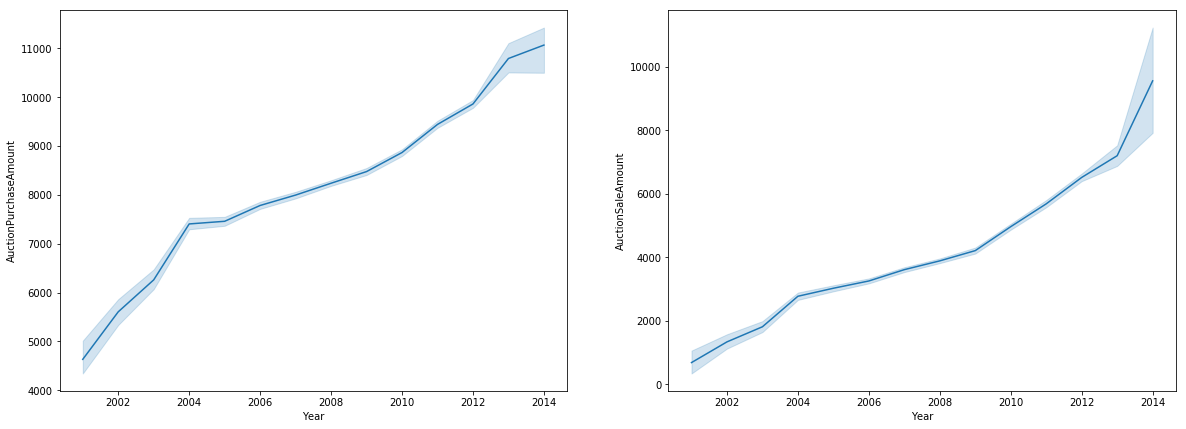

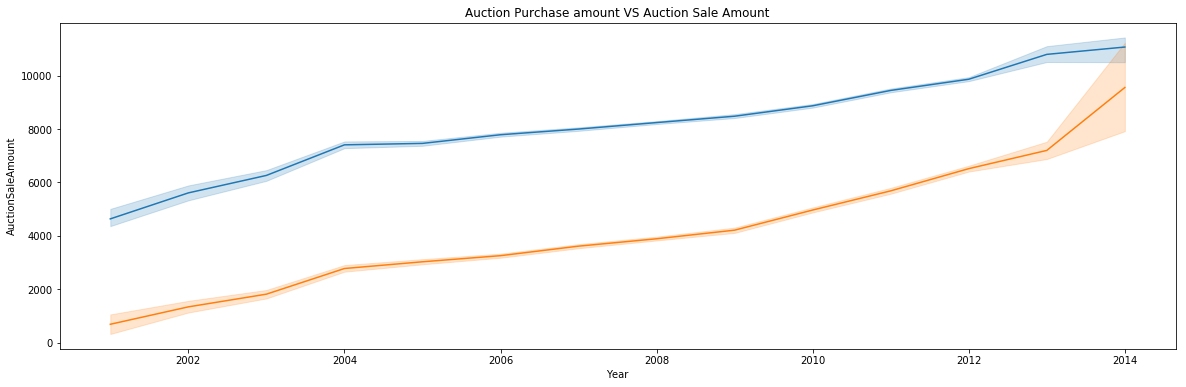

In [74]:
price_df = [df['AuctionPurchaseAmount'], df['AuctionSaleAmount']]
fig, ax = plt.subplots(1,2, figsize = (20, 7))
sns.lineplot(x = df['Year'], y = df['AuctionPurchaseAmount'], data = df, ax = ax[0])
sns.lineplot(x = df['Year'], y = df['AuctionSaleAmount'], data = df, ax = ax[1], markers = True)


fig, ax = plt.subplots(1,1, figsize = (20, 6))
sns.lineplot(x = df['Year'], y = df['AuctionPurchaseAmount'], data = df)
sns.lineplot(x = df['Year'], y = df['AuctionSaleAmount'], data = df, markers = True)
ax.set(title = 'Auction Purchase amount VS Auction Sale Amount')


On average, looks like the Trucks have a high purchase and sale amount than other vehicle categories and from observing the data, AuctionPurchaseAmount for all vehicles is higher than AuctionSaleAmount

Next we use a heat map to visualize the co relations existing between different variables. This will help us understand which variables the sale and purchase price are dependant on and how extreme the dependancy is, 

In [55]:
df.corr()


,VehicleID,AuctionPurchaseAmount,AuctionSaleAmount,Year,AuctionPurchaseOdometer,AutomaticTransmission
VehicleID,1.000000,0.057879,0.088084,0.099300,-0.011646,0.034014
AuctionPurchaseAmount,0.057879,1.000000,0.623743,0.404710,-0.012153,0.072328
AuctionSaleAmount,0.088084,0.623743,1.000000,0.457397,-0.012604,0.095202
Year,0.099300,0.404710,0.457397,1.000000,-0.020208,0.072391
AuctionPurchaseOdometer,-0.011646,-0.012153,-0.012604,-0.020208,1.000000,-0.002195
AutomaticTransmission,0.034014,0.072328,0.095202,0.072391,-0.002195,1.000000


The Pearson Correlation measures the linear dependence between two variables. The resulting coefficient is a value between -1 and 1 inclusive, where:

1: Total positive linear correlation.
0: No linear correlation, the two variables most likely do not affect each other.
-1: Total negative linear correlation.


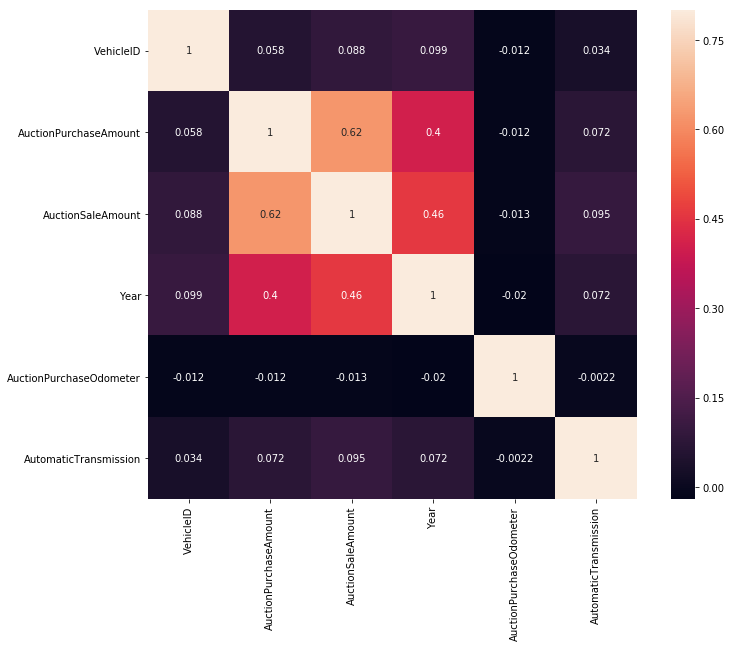

In [58]:
# Correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True, annot=True)
plt.show()